In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import itertools
import os, glob
import shutil
import random
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from model import Inception_v3model, VGG16model
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [17]:
images = '/home/pteradox/Galvanize/capstones/crowd-sound-affect/dataset/step4_split_spectrograms/dataset_training/all_freq'
validation = '/home/pteradox/Galvanize/capstones/crowd-sound-affect/dataset/step4_split_spectrograms/dataset_test/all_freq'

In [18]:
Inception_model = Inception_v3model(images, validation)

In [19]:
Inception_model.fit()

Found 30444 images belonging to 3 classes.
Found 7616 images belonging to 3 classes.


In [20]:
Inception_model.model_build()

AttributeError: module 'tensorflow.keras' has no attribute 'callabcks'

In [4]:
vgg_all = VGG16model(images, validation)

In [6]:
vgg_all.fit()

Found 30444 images belonging to 3 classes.
Found 7616 images belonging to 3 classes.


In [8]:
vgg_all.model_fit()

Epoch 1/50
1903/1903 [==============================] - 1497s 785ms/step - loss: 23.8152 - accuracy: 0.8911 - val_loss: 0.1532 - val_accuracy: 0.9610
Epoch 2/50
1903/1903 [==============================] - 1426s 749ms/step - loss: 0.1050 - accuracy: 0.9681 - val_loss: 0.2344 - val_accuracy: 0.9399
Epoch 3/50
1903/1903 [==============================] - 1464s 769ms/step - loss: 0.1059 - accuracy: 0.9700 - val_loss: 0.1466 - val_accuracy: 0.9711
Epoch 4/50
1903/1903 [==============================] - 1395s 733ms/step - loss: 0.1072 - accuracy: 0.9710 - val_loss: 0.1770 - val_accuracy: 0.9643
Epoch 5/50
1903/1903 [==============================] - 1339s 703ms/step - loss: 0.0675 - accuracy: 0.9826 - val_loss: 0.1647 - val_accuracy: 0.9666
Epoch 6/50
1903/1903 [==============================] - 1364s 717ms/step - loss: 0.0900 - accuracy: 0.9768 - val_loss: 0.2055 - val_accuracy: 0.9714
Epoch 7/50
1903/1903 [==============================] - 1409s 740ms/step - loss: 0.0403 - accuracy: 0.989

KeyboardInterrupt: 

In [12]:
# images are normalized from 0-1. 

# images_bark = tf.keras.preprocessing.image_dataset_from_directory('../dataset/step4_split_spectrograms/dataset_images_training/bark')
# images_dis = tf.keras.preprocessing.image_dataset_from_directory('../dataset/step4_split_spectrograms/dataset_images_training/disapproval_all')
# images_neutral+ tf.keras.preprocessing.image_dataset_from_directory('../dataset/step4_split_spectrograms/dataset_images_training/neutral_all')
images_bark = '/home/pteradox/Galvanize/capstones/crowd-sound-affect/dataset/step4_split_spectrograms/dataset_training/bark'
validation_bark = '/home/pteradox/Galvanize/capstones/crowd-sound-affect/dataset/step4_split_spectrograms/dataset_test/bark'


In [167]:
images = '/home/pteradox/Galvanize/capstones/crowd-sound-affect/dataset/step4_split_spectrograms/dataset_training/all_freq'
validation = '/home/pteradox/Galvanize/capstones/crowd-sound-affect/dataset/step4_split_spectrograms/dataset_test/all_freq'

FULL DATA SET

In [ ]:
images = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=images, target_size=(224,224), batch_size=16)


In [168]:
test_all = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=images, target_size=(224,224), batch_size=16)

Found 30444 images belonging to 3 classes.


In [164]:
images

'/home/pteradox/Galvanize/capstones/crowd-sound-affect/dataset/step4_split_spectrograms/dataset_training/all_freq/*'

In [ ]:
validation = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=validation, target_size=(224,224), batch_size=16)

TRAINING

In [13]:
train_bark = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=images_bark, target_size=(224,224), batch_size=16)
#converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset (normalizing between -1 to 1), without scaling. 

Found 7611 images belonging to 3 classes.


In [14]:
validation_bark = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=validation_bark, target_size=(224,224), batch_size=16, shuffle=False)

Found 1904 images belonging to 3 classes.


In [124]:
imgs, labels = next(train_bark)

In [69]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(imgs)
print(labels)

In [15]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 602115    
Total params: 621,507
Trainable params: 621,507
Non-trainable params: 0
__________________________________________________

In [18]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
callback = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2), tf.keras.callbacks.ModelCheckpoint(filepath='model_checkpoints/')]

Baseline Data

In [ ]:
model.fit(x=train_bark,
    steps_per_epoch=len(train_bark),
    validation_data=validation_bark,
    validation_steps=len(validation_bark),
    epochs=50,
    verbose=1, callbacks=callback)
#batch 32/learning rate .01/categorical_crossentroy, accuracy
# 238/238 [==============================] - 242s 1s/step - loss: 0.6378 - accuracy: 0.7752 - val_loss: 0.6460 - val_accuracy: 0.7710

Improvement

In [ ]:
model.fit(x=train_bark,
    steps_per_epoch=len(train_bark),
    validation_data=validation_bark,
    validation_steps=len(validation_bark),
    epochs=10,
    verbose=1, callbacks=[callback])
# train_bark = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    # .flow_from_directory(directory=images_bark, target_size=(224,224), batch_size=16)
    #model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
    # 476/476 [==============================] - 309s 648ms/step - loss: 0.1439 - accuracy: 0.9574 - val_loss: 0.1803 - val_accuracy: 0.9428

Confusion Matrix

In [132]:
Y_pred = model.predict(validation_bark, 1904// 16+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_bark.classes, y_pred)
print(cm)
print('Classification Report')
target_names = ['Approval', 'Disapproval', 'Neutral']
print(classification_report(validation_bark.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 353    0    5]
 [   6   49   23]
 [  66    9 1393]]
Classification Report
              precision    recall  f1-score   support

    Approval       0.83      0.99      0.90       358
 Disapproval       0.84      0.63      0.72        78
     Neutral       0.98      0.95      0.96      1468

    accuracy                           0.94      1904
   macro avg       0.89      0.85      0.86      1904
weighted avg       0.95      0.94      0.94      1904



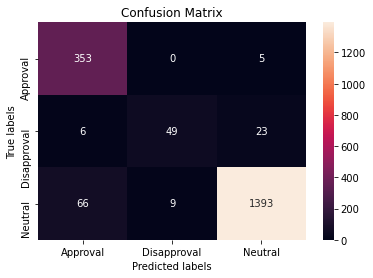

In [133]:
  

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Approval', 'Disapproval', 'Neutral']); ax.yaxis.set_ticklabels(['Approval', 'Disapproval', 'Neutral']);

# Inception V3 Model

In [ ]:

train_bark_incep = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)\
    .flow_from_directory(directory=images_bark, target_size=(224,224), batch_size=16)


In [143]:
valid_bark_incep = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)\
    .flow_from_directory(directory=validation_bark, target_size=(224,224), batch_size=16)

Found 1904 images belonging to 3 classes.


In [145]:
model_incep = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
])

In [150]:
model_incep.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)

In [151]:
model_incep.fit(x=train_bark_incep,
    steps_per_epoch=len(train_bark_incep),
    validation_data=valid_bark_incep,
    validation_steps=len(valid_bark_incep),
    epochs=50,
    verbose=1, callbacks=[callback])

# 476/476 [==============================] - 258s 542ms/step - loss: 9.4135e-05 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9984

Epoch 1/50
476/476 [==============================] - 258s 541ms/step - loss: 0.0864 - accuracy: 0.9788 - val_loss: 0.0582 - val_accuracy: 0.9790
Epoch 2/50
476/476 [==============================] - 248s 520ms/step - loss: 0.0449 - accuracy: 0.9875 - val_loss: 0.0378 - val_accuracy: 0.9900
Epoch 3/50
476/476 [==============================] - 253s 530ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0516 - val_accuracy: 0.9795
Epoch 4/50
476/476 [==============================] - 247s 519ms/step - loss: 0.0189 - accuracy: 0.9932 - val_loss: 0.0178 - val_accuracy: 0.9921
Epoch 5/50
476/476 [==============================] - 241s 506ms/step - loss: 0.0235 - accuracy: 0.9933 - val_loss: 0.0261 - val_accuracy: 0.9911
Epoch 6/50
476/476 [==============================] - 256s 538ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.0049 - val_accuracy: 0.9989
Epoch 7/50
476/476 [==============================] - 253s 531ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.0256 -